In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
with np.load("GPU-cubature-newtria-T5e3-100runs-mean-median-time.npz") as loaded:
    gpu_cubature_std_seq_mean_time=loaded["gpu_cubature_std_seq_mean_time"]
    gpu_cubature_std_par_mean_time=loaded["gpu_cubature_std_par_mean_time"]
    gpu_cubature_sqrt_seq_mean_time=loaded["gpu_cubature_sqrt_seq_mean_time"]
    gpu_cubature_sqrt_par_mean_time=loaded["gpu_cubature_sqrt_par_mean_time"]

with np.load("GPU-extended-newtria-T5e3-100runs-mean-mediantime.npz") as loaded:
    gpu_extended_std_seq_mean_time=loaded["gpu_extended_std_seq_mean_time"]
    gpu_extended_std_par_mean_time=loaded["gpu_extended_std_par_mean_time"]
    gpu_extended_sqrt_seq_mean_time=loaded["gpu_extended_sqrt_seq_mean_time"]
    gpu_extended_sqrt_par_mean_time=loaded["gpu_extended_sqrt_par_mean_time"]


In [3]:
T = 5000
lengths_space = np.logspace(2, int(np.log2(T)), num=10, base=2, dtype=int)


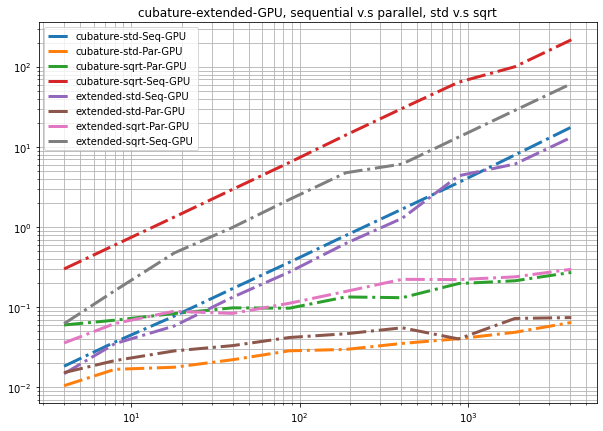

In [5]:
plt.figure(figsize=(10,7))
plt.loglog(lengths_space, gpu_cubature_std_seq_mean_time, label="cubature-std-Seq-GPU", linestyle="-.", linewidth=3)
plt.loglog(lengths_space, gpu_cubature_std_par_mean_time, label="cubature-std-Par-GPU", linestyle="-.", linewidth=3)
plt.loglog(lengths_space, gpu_cubature_sqrt_par_mean_time, label="cubature-sqrt-Par-GPU", linestyle="-.", linewidth=3)
plt.loglog(lengths_space, gpu_cubature_sqrt_seq_mean_time, label="cubature-sqrt-Seq-GPU", linestyle="-.", linewidth=3)
plt.loglog(lengths_space, gpu_extended_std_seq_mean_time, label="extended-std-Seq-GPU", linestyle="-.", linewidth=3)
plt.loglog(lengths_space, gpu_extended_std_par_mean_time, label="extended-std-Par-GPU", linestyle="-.", linewidth=3)
plt.loglog(lengths_space, gpu_extended_sqrt_par_mean_time, label="extended-sqrt-Par-GPU", linestyle="-.", linewidth=3)
plt.loglog(lengths_space, gpu_extended_sqrt_seq_mean_time, label="extended-sqrt-Seq-GPU", linestyle="-.", linewidth=3)

plt.grid(True, which="both")
plt.title("cubature-extended-GPU, sequential v.s parallel, std v.s sqrt")
plt.legend()
plt.show()

In [15]:
data = np.stack([lengths_space,
                 gpu_cubature_std_seq_mean_time,
                 gpu_cubature_std_par_mean_time,
                 gpu_cubature_sqrt_par_mean_time,
                 gpu_cubature_sqrt_seq_mean_time,
                 gpu_extended_std_seq_mean_time,
                 gpu_extended_std_par_mean_time,
                 gpu_extended_sqrt_par_mean_time,
                 gpu_extended_sqrt_seq_mean_time],
                 axis=1)

columns = ["time_steps",
          "gpu_cubature_std_seq_mean_time",
          "gpu_cubature_std_par_mean_time",
          "gpu_cubature_sqrt_par_mean_time",
          "gpu_cubature_sqrt_seq_mean_time",
          "gpu_extended_std_seq_mean_time",
          "gpu_extended_std_par_mean_time",
          "gpu_extended_sqrt_par_mean_time",
          "gpu_extended_sqrt_seq_mean_time"]

df = pd.DataFrame(data=data, columns=columns)
df.to_csv("GPU-all-methods")

